In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [13]:
# Load dataset from kaggle
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
# Data Preprocessing
# Convert categorical variables into numerical form.

df_encoded = pd.get_dummies(df, drop_first=True)

# Feature Selection
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make Predictions
y_pred = lr.predict(X_test)

# Model Evaluation (MAE & RMSE)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 4181.194473753649
Root Mean Squared Error (RMSE): 5796.284659276272


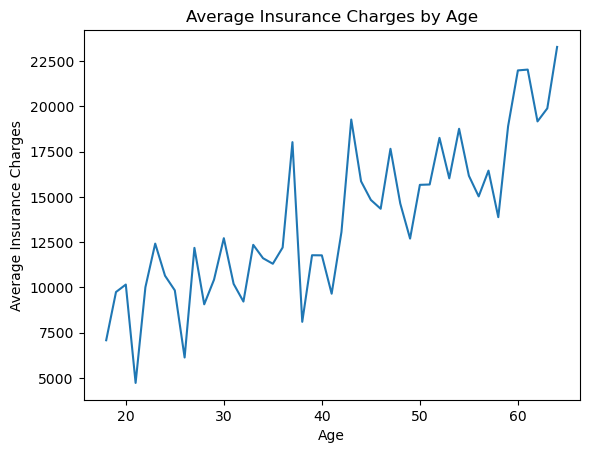

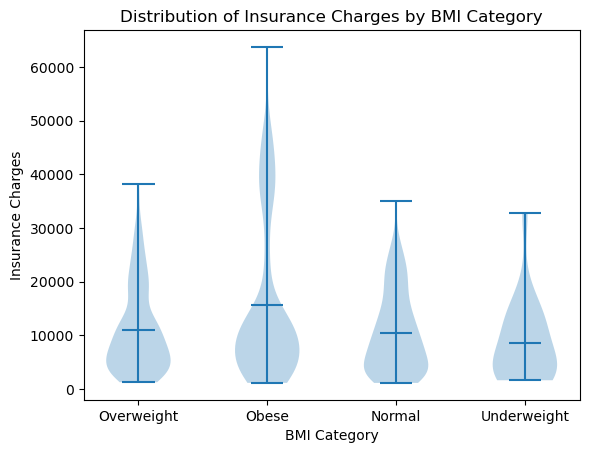

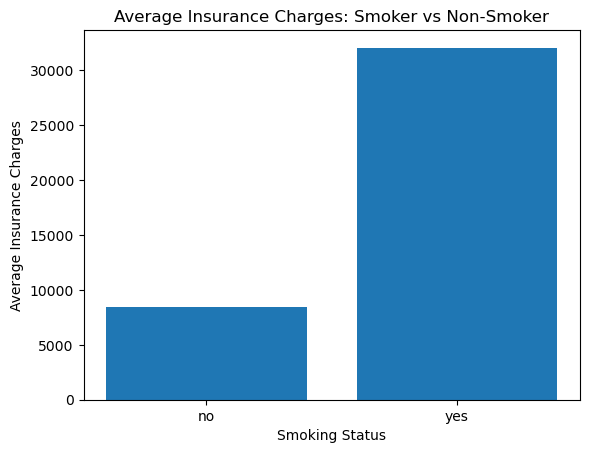

In [20]:
# Visualization of Feature Impact
# Age vs Insurance Charges
age_charge = df.groupby('age')['charges'].mean()

plt.figure()
plt.plot(age_charge)
plt.xlabel("Age")
plt.ylabel("Average Insurance Charges")
plt.title("Average Insurance Charges by Age")
plt.show()


# BMI vs Insurance Charges
plt.figure()
plt.violinplot(
    [df[df['bmi_category'] == cat]['charges'] for cat in df['bmi_category'].unique()],
    showmeans=True
)
plt.xticks(
    range(1, len(df['bmi_category'].unique()) + 1),
    df['bmi_category'].unique()
)
plt.xlabel("BMI Category")
plt.ylabel("Insurance Charges")
plt.title("Distribution of Insurance Charges by BMI Category")
plt.show()


# Smoking Status vs Insurance Charges
smoker_charge = df.groupby('smoker')['charges'].mean()

plt.figure()
plt.bar(smoker_charge.index, smoker_charge.values)
plt.xlabel("Smoking Status")
plt.ylabel("Average Insurance Charges")
plt.title("Average Insurance Charges: Smoker vs Non-Smoker")
plt.show()

# CONCLUSION
This project demonstrates the effective use of regression modeling to estimate medical insurance costs and extract meaningful insights from healthcare data. The combination of clean preprocessing, professional visualizations, and proper error evaluation makes this analysis suitable for real-world healthcare and insurance applications.